# **Iranian Telecommunications Dataset**

Lab Assignment One: Exploring Table Data\
***Bryan Putnam, Dan Tao, Lane Carpenter***

## **Dataset**

Iranian Churn. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5JW3Z.

## **1. Business Understanding**

### **Overview of Iranian Telecommunications Churn Dataset**
This dataset comes from the University of California, Irvine, Machine Learning Repository. It consists of randomly collected information from an Iranian telecommunications company. Except for churn, all features are aggregated data over nine months, while the churn value is calculated after 12 months. With over 3000 rows of data, this dataset represents one telecommunication customer per row and contains 14 columns representing different telecommunications attributes. Except for the attribute 'churn,' all attribute values represent aggregated data, although sources are unknown. While some features represent 1:1 numerical values such as 'Seconds of Use' or 'Frequency of Use,' other features such as 'Age Group' or 'Charge Amount' represent ordinal values, where the actual difference between values is unknown, and the values themselves only represent ordinal groupings.
### **What Is The Purpose of This Dataset**
This dataset collects information on telecommunication attributes related to customer attrition or churn. The features provided in this dataset represent mostly numerical data based on customer usage that can be used to relate to customer churn. As a result of this dataset, telecommunications companies can get a better idea of what leads to customer churn over time and improve their prediction skills.

### **Why Was The Data Collected?**
The data from this dataset was collected randomly. While there is no information available regarding the original nature of why this data was collected, there is a logical answer. The data for this dataset was likely collected to assess a possible customer attrition problem in the hopes that a pattern could be seen between certain attribute values and customer loss. As seen later in this document, several features related to customers' frequency of use, as well as customer complaints and call failures, could relate to eventual churn.

### **How Was The Data Collected**
Unfortunately, due to the nature of this dataset being donated anonymously to the University of California, Irvine, there is no information regarding the collection methods of this data. While there is no record of how this data was collected, the data was likely collected through aggregation of data from call and SMS records, customer account information, network data, and routing information associated with customer accounts and cellular devices. This assumption is further supported by The World Bank (The World Bank, n.d.).

### **What Is The Prediction Task For The Data**
First and foremost, our prediction task for this data is to find patterns between features wherever possible. Due to the nature of the dataset and the assumed and likely purpose of collecting the data, a primary prediction task for this particular dataset is to predict customer churn based on various telecommunications attributes from customers.

### **What Results Would Third Parties Be Interested In?**
Telecommunications companies would be interested in results that give concrete or data-centric speculation on the reasons behind customer churn. While there is some data, such as frequency of use, where patterns relating to customer churn could be valuable in other industries, correlations, such as call failures to customer churn, are more explicitly directed to telecommunications. Furthermore, third parties would be interested in results that show a correlation between attributes logically thought not to be correlated. One instance of this later on in the report is customer values' inverse relationship with subscription length.

### **Why Would Third Parties Be Interested In The Result**
Realistically, third parties would be interested in these results because it could help them retain and bring in more customers. Furthermore, accurate prediction on causes of churn or other relationships could save third-party companies money by directing them towards potential issues without pricing and sourcing full-scale investigations to find them. Apart from the reasons above, companies may find value in understanding the relationship between customers and businesses regarding how customers use their products and how often they use them.

### **How Well Does Your Prediction Algorithm Need To Perform To Be Considered Useful To Third Parties**
In order to be valuable for third parties, the customer churn prediction algorithm needs to achieve a high level of accuracy. Ideally, the model should have an accuracy of at least 70% (Fiddler AI, n.d.) to ensure that it correctly identifies customers likely to churn most of the time. This accuracy level helps telecom companies implement effective retention strategies, reducing unnecessary efforts and focusing resources on customers at real risk of leaving. Accurate predictions enable better-targeted marketing campaigns and personalized offers, ultimately improving customer satisfaction and retention and enhancing the company's profitability. Achieving this accuracy standard demonstrates the model's practical value in retaining customers and supporting business goals.

## **2. Data Understanding**

Load the dataset and appropriately define data types.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Step 1: Read the CSV file into a DataFrame
url = 'https://raw.githubusercontent.com/Dan-Barbarossa/Summer-Python-Machine-Learning/main/Customer%20Churn.csv'
df = pd.read_csv(url)

# Display the updated DataFrame, print out the first 5 rows as preview
df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


First, let us review the information in our dataset to clarify each data attribute and their respective types.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

### **2.1 Data Description**

A total of 6 variables are presented, comprising 3,150 entries of observations. **The descriptions of each variable are as follows:**


1.   **(Row Numbers:)** Anonymous Customer ID

2.   **Call Failures:** number of call failures

3.   **Complains:** binary (0: No complaint, 1: complaint)

4.   **Subscription Length:** total months of subscription

5.   **Charge Amount:** Ordinal attribute (0: lowest amount, 9: highest amount)

6.   **Seconds of Use:** total seconds of calls

7.   **Frequency of use:** total number of calls

8.   **Frequency of SMS:** total number of text messages

9.   **Distinct Called Numbers:** total number of distinct phone calls

10.  **Age Group:** ordinal attribute (1: younger age, 5: older age)

11.  **Tariff Plan:** binary (1: Pay as you go, 2: contractual)

12.  **Status:** binary (1: active, 2: non-active)

13.  **Churn:** binary (1: churn, 0: non-churn) - Class label

14.  **Customer Value:** The calculated value of customer


Here, the Churn serves as the target variable, while the remaining variables function as predictor variables.

### **2.2 Variable Datatypes**



**Categorical Variables:**

    Anonymous Customer ID
    Complaints (binary: 0 - No complaint, 1 - Complaint)
    Charge Amount (ordinal: 0 - Lowest amount, 9 - Highest amount)
    Age Group (ordinal: 1 - Younger age, 5 - Older age)
    Tariff Plan (binary: 1 - Pay as you go, 2 - Contractual)
    Status (binary: 1 - Active, 2 - Non-active)
    Churn (binary: 1 - Churn, 0 - Non-churn)

**Numerical Variables:**

    Call Failures: Number of call failures
    Subscription Length: Total months of subscription
    Seconds of Use: Total seconds of calls
    Frequency of Use: Total number of calls
    Frequency of SMS: Total number of text messages
    Distinct Called Numbers: Total number of distinct phone calls
    Customer Value: The calculated value of the customer



### **2.3 Data Quality**

#### Missing or Duplicated Data

Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  
Steps: Find and omit any duplicates if any, impute in order to fill misssing data.
Then, assess data quality.

Now, let us check the dataset for any null or duplicate values.

In [3]:
# Check for any null or duplicated values in data set
missing_data = df.isnull().sum()
duplicated_data = df.duplicated().sum()

missing_data, duplicated_data

(Call  Failure              0
 Complains                  0
 Subscription  Length       0
 Charge  Amount             0
 Seconds of Use             0
 Frequency of use           0
 Frequency of SMS           0
 Distinct Called Numbers    0
 Age Group                  0
 Tariff Plan                0
 Status                     0
 Age                        0
 Customer Value             0
 Churn                      0
 dtype: int64,
 300)

Howerver, further examination shows there are **300 duplicates** in this dataset. This can throw analyze results off balance, comprimise its intigrity by introducing bias and lead to model overfitting problems. Duplicates are easy to find, yet hard to be verified. In order to prevent a failure to construct a fidel user protrait, we may need to keep duplicate data but resolve any conflicts or inconsistencies among them. In this report, since we are not the original collectors of the data, we have decided that the safest approach is to delete all duplicate entries

In [4]:
# Remove duplicated rows
clean_df = df.drop_duplicates()

# Shape of the Data Frame
clean_df.shape

(2850, 14)

#### Column Naming
While viewing the column names, notice an extra space between words in Call Failures and Subscription Length. As we visualize our data, extra spaces in the column names could lead to programming errors.

In [5]:
# Display column names
clean_df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

We can use the .lower() function to lowercase all of the names. Then, we can use split to list the strings that make up the name without whitespace. Finally, we can use join to convert all the strings into a single string with the names separated by underscores.

In [6]:
# Rename columns and display them
clean_df.columns = ['_'.join(col.lower().split()) for col in clean_df.columns]
clean_df.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

### **2.4 Data Representation**

Currently, the age_group column is an ordinal numeric feature. This is fine for using the data, but it's harder to understand what the group actually means. So, to help us reason and visualize the data more precisely, let us group by the age_group, select age, and find the min and max for each group.

In [7]:
# Group by the age_group, select the age and use the aggregate function to return the min and max value from each group
# reset the index age_group is a column in the data frame and not the index itself
df_grouped = clean_df.groupby('age_group')['age'].agg([min, max]).reset_index()
df_grouped

,age_group,min,max
0,1,15,15
1,2,25,25
2,3,30,30
3,4,45,45
4,5,55,55


Now that we have the minimum and maximum age for each age_group, we can map to a string representation that will replace the numeric values.

In [8]:
# Technique was taken from: (Raschka, 2020, Chapter 4) I changed the variable names to match the context of this project but kept the technique the same
# Generative AI use: ChatGPT was used to generate the new names for age groups
# Start
age_group_map = {
    1: 'Teenager',
    2: 'Young Adult',
    3: 'Adult',
    4: 'Middle Aged',
    5: 'Senior'
    }
# End

# Use map function to replace age_group numeric values with string representations
clean_df['age_group'] = clean_df['age_group'].map(age_group_map)

# Again group by age_group and aggregate the age column to find the min and max ages in each group
df_grouped = clean_df.groupby('age_group')['age'].agg([min, max])

# Sort the by the min age and reset the index
df_grouped = df_grouped.sort_values(by='min').reset_index()

# Display df_grouped
df_grouped


,age_group,min,max
0,Teenager,15,15
1,Young Adult,25,25
2,Adult,30,30
3,Middle Aged,45,45
4,Senior,55,55


Finally, let us convert age_groups to a categorical feature and use df_grouped as a list to specify the order.

In [9]:
# Get a list of age groups in sorted order
age_group_order = df_grouped['age_group'].tolist()

# Convert age_group to a categorical type with the specified order
clean_df['age_group'] = pd.Categorical(clean_df['age_group'], categories=age_group_order, ordered=True)

# Display clean_df info
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   call_failure             2850 non-null   int64   
 1   complains                2850 non-null   int64   
 2   subscription_length      2850 non-null   int64   
 3   charge_amount            2850 non-null   int64   
 4   seconds_of_use           2850 non-null   int64   
 5   frequency_of_use         2850 non-null   int64   
 6   frequency_of_sms         2850 non-null   int64   
 7   distinct_called_numbers  2850 non-null   int64   
 8   age_group                2850 non-null   category
 9   tariff_plan              2850 non-null   int64   
 10  status                   2850 non-null   int64   
 11  age                      2850 non-null   int64   
 12  customer_value           2850 non-null   float64 
 13  churn                    2850 non-null   int64   
dtypes: category(1

Observe that the age_group type is now category.

## **3. Data Visualization**

### **Visualize Basic Feature Distributions**

#### Customers across age groups
Let us visualize the distribution of the customers across the different age groups.

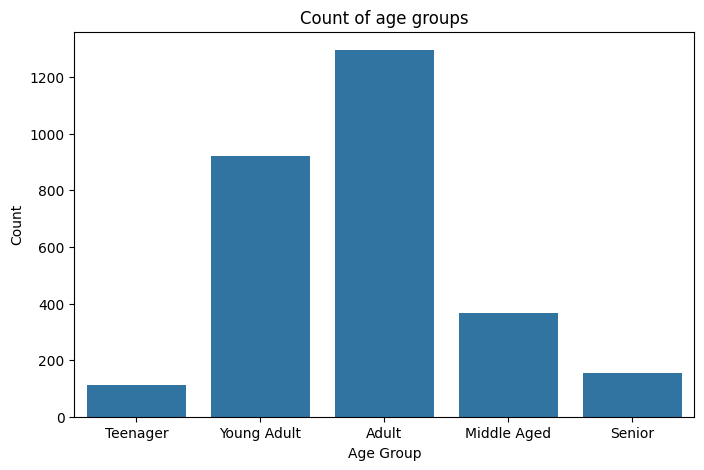

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a count plot of age_group in clean_df
sns.countplot(x='age_group', data=clean_df)

# Set the title of the plot
plt.title('Count of age groups')

# Set the x-axis label
plt.xlabel('Age Group')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()

**Analysis**

The bar graph shows a normal distribution, with most values between the 25th and 75th quartile. A business insight we can glean from this is which age groups our customers predominantly fall into. We might use this to direct ads to a particular age group. For example, they could try to increase our market share of middle-aged adults by directing marketing to that particular group.

#### Analyzing the Relationship Between Usage Patterns and Customer Churn
Let us visualize the relationship between seconds of use and frequency of use by churn status to explore potential correlations and understand how these metrics might influence customer churn.


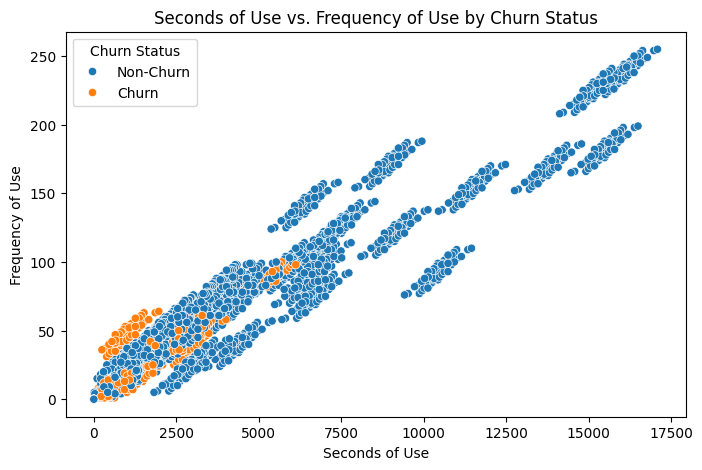

In [11]:
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a scatterplot with seconds_of_use on the x-axis, frequency_of_use on the y-axis, and color by churn status
scatter = sns.scatterplot(data=clean_df, x='seconds_of_use', y='frequency_of_use', hue='churn')

# Set the title of the plot
plt.title('Seconds of Use vs. Frequency of Use by Churn Status')

# Label the x-axis
plt.xlabel('Seconds of Use')

# Label the y-axis
plt.ylabel('Frequency of Use')

# Adjusting the legend
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles, labels=['Non-Churn', 'Churn'], title='Churn Status', loc='upper left')
'''
ChatGPT: Originaly I had plt.legend(title='Churn Status', labels=['Non-Churn', 'Churn']) for changing the legend but the color didn't match the color on the plotted points
Asking ChatGPT it recommended that I save an instance of sns.scatterplot and adjust the label on that instance.
'''
# Display the plot
plt.show()


**Analysis**

Based on the visual, we can see a strong relationship between Seconds of Use and Frequency of Use. As the total number of seconds of use increases, the frequency of use also increases. We also see that churned customers are predominantly grouped in the bottom left of the plot, indicating that customers with lower values for both Seconds of Use and Frequency of Use are likelier to churn. A business might use this information to identify customers at risk of churning and try to increase their engagement by adding a new feature or some other incentive.

#### Non-Active Rate for Customers of Each age Group With different Plans, Compared

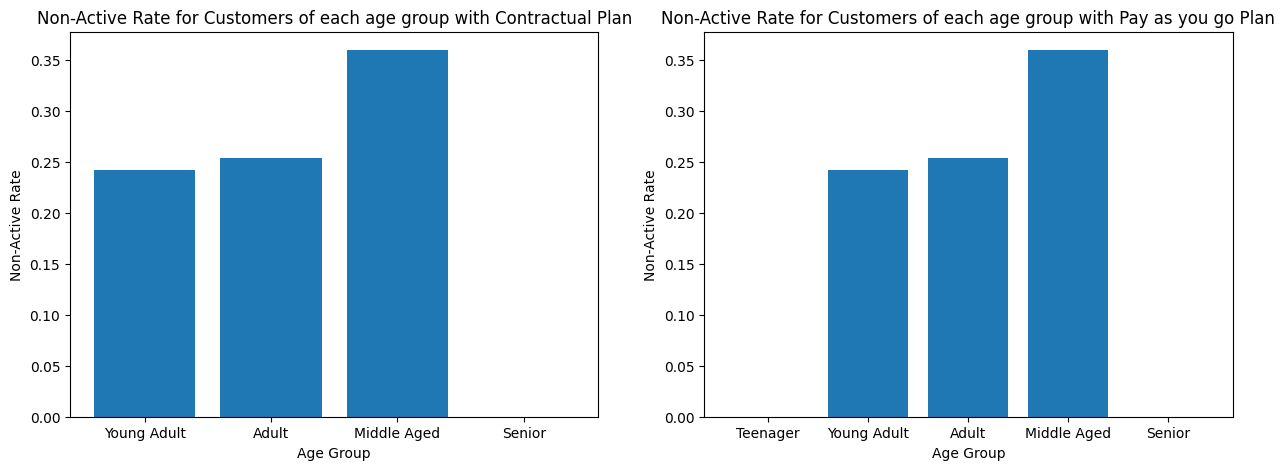

In [12]:
age_status_crosstab = pd.crosstab(clean_df['age_group'], clean_df['status']) # basic format of this code is from gemini

# Calculate the non-active rate for each age group
age_status_crosstab['non-active_rate'] = age_status_crosstab[2] / (age_status_crosstab[1] + age_status_crosstab[2])

# Filter the crosstab table for only contractual plan customers
age_status_crosstab_contractual = age_status_crosstab[age_status_crosstab.index.isin(['Young Adult', 'Adult', 'Middle Aged', 'Senior'])]

# Filter the crosstab table for only Pay as you go plan customers
age_status_crosstab_paygo = age_status_crosstab[age_status_crosstab.index.isin(['Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the non-active rate for contractual plan customers
ax1.bar(age_status_crosstab_contractual.index, age_status_crosstab_contractual['non-active_rate'])
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Non-Active Rate')
ax1.set_title('Non-Active Rate for Customers of each age group with Contractual Plan')

# Plot the non-active rate for Pay as you go plan customers
ax2.bar(age_status_crosstab_paygo.index, age_status_crosstab_paygo['non-active_rate'])
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Non-Active Rate')
ax2.set_title('Non-Active Rate for Customers of each age group with Pay as you go Plan')

# Show the plot
plt.show()

**Analysis**

Based on the visual, middle-aged customers with contractual plans have relatively high non-active rates, exceeding 35%. The inactivity rates of young adults and adults are very similar, hovering around 25%. An intriguing phenomenon is that the inactivity rate among seniors is nearly 0%. Correspondingly, the inactivity rate among senior users on a pay-as-you-go plan is also close to 0%, similar to that of teenagers. This data may support the notion that Iranian teenagers and seniors have ample spare time for social activities such as long phone conversations and exchanging SMS messages.

#### Complain Rate of Each Age Group

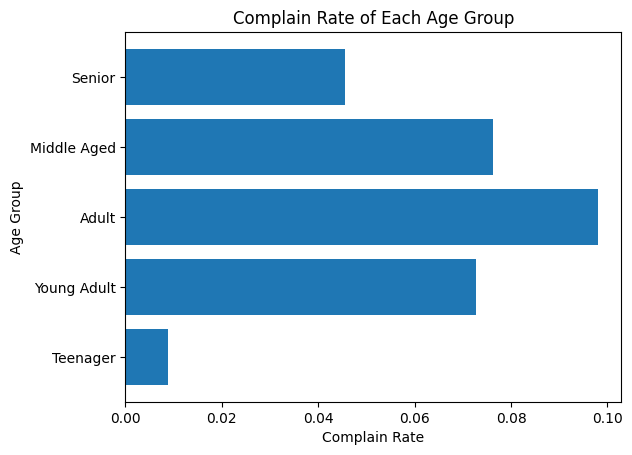

In [13]:
crosstab = pd.crosstab(clean_df['age_group'], clean_df['complains'])

# Calculate the complain rate for each age group
complain_rate = crosstab[1] / (crosstab[0] + crosstab[1])

# Create a horizontal histogram
plt.barh(complain_rate.index, complain_rate.values)
plt.xlabel('Complain Rate')
plt.ylabel('Age Group')
plt.title('Complain Rate of Each Age Group')
plt.show()

**Analysis**

The plotted data shows that most complaints come from adult, middle-aged, and young adult customers, making up the majority of complainants. Almost 10% of adult users have filed complaints, which challenges the telecom company's ability to retain customers. Telecom services are essential in modern society, so customers are generally less sensitive to price changes. Similarly, customers may show less brand loyalty if they can get a telecom service at a lower price or better quality elsewhere. However, some service providers can maintain strong brand loyalty if they effectively meet customers' essential needs.

#### Charge Amount for the top 25% in customer value

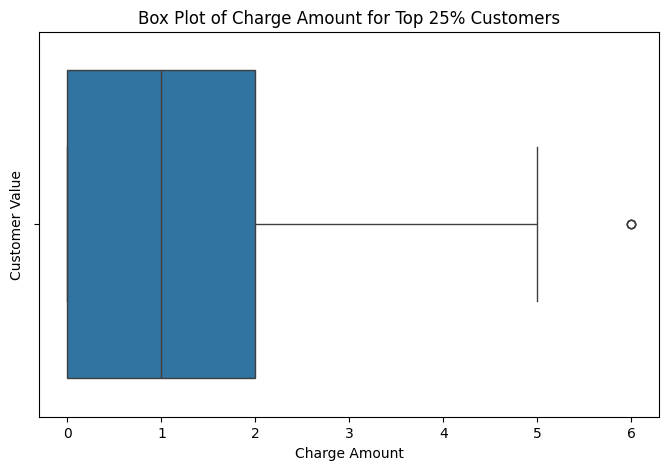

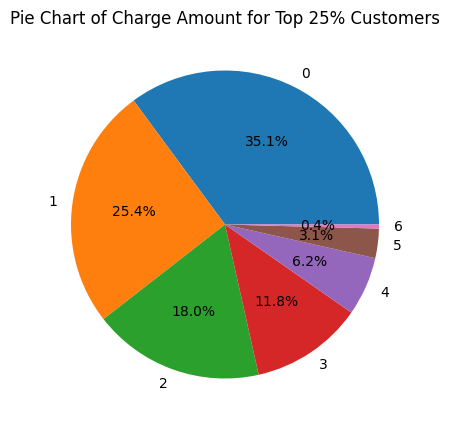

In [14]:
# Get the top 25% of customer values
top_25_customers = clean_df.nlargest(len(clean_df) // 4, 'customer_value')

# Create a box plot of charge amount for top 25% customers
plt.figure(figsize=(8, 5))
sns.boxplot(x=top_25_customers['charge_amount'])
plt.xlabel('Charge Amount')
plt.ylabel('Customer Value')
plt.title('Box Plot of Charge Amount for Top 25% Customers')
plt.show()

# Create a pie chart of charge amount for top 25% customers
plt.figure(figsize=(8, 5))
plt.pie(top_25_customers['charge_amount'].value_counts(), labels=top_25_customers['charge_amount'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Charge Amount for Top 25% Customers')
plt.show()


**Analysis**

Even for those who ranked in the top 25% in customer value assessment, most were enrolled in type 1 and 2 payment plans instead of the higher-end ones we expected before we conducted our analysis. It is sufficient for us to conclude that the sheer revenue contributed does not hold significant weight in this company's customer value scoring system. If it is not revenue, then perhaps it is customer loyalty, reflected by their churn rate.

### **3.2 Answering Interesting Questions through Data Visualization**

#### 3.1.1 How does the frequency of use change over the subscription length, and does this trend differ between churned and non-churned customers?

**What we hope to understand**

We aim to examine how the frequency of use changes over the length of the subscription and to determine if there are any noticeable differences in this trend between customers who churn and those who do not. This analysis can help identify patterns that indicate potential churn, allowing the company to take proactive measures.



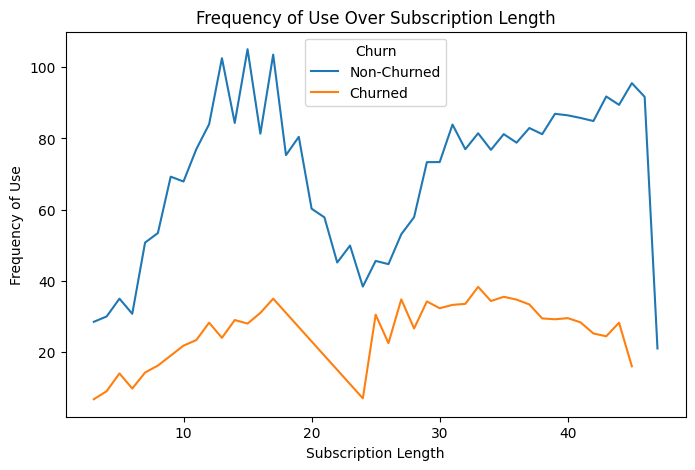

In [15]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Generate a line plot to show the average frequency of use over the subscription length
# 'ci=None' is used to disable the confidence interval shading
sns.lineplot(x='subscription_length', y='frequency_of_use', hue='churn', data=clean_df, ci=None)

# Set the title of the plot
plt.title('Frequency of Use Over Subscription Length')

# Set the x-axis label
plt.xlabel('Subscription Length')

# Set the y-axis label
plt.ylabel('Frequency of Use')

# Set the legend title and labels to indicate churn status
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])

# Display the plot
plt.show()

**Observations and Answer**

The line plot shows that non-churned customers have a higher frequency of use over their subscription length compared to churned customers. Non-churned customers' usage peaks around the 10-15 month range and generally remains higher. In contrast, churned customers start with lower usage, have a slight increase up to the 15-month mark, and then their usage drops significantly.

**Implications**

Higher frequency of use is associated with lower churn rates. Customers who use the service more frequently are more likely to remain subscribed, while those with lower usage are at higher risk of churning. The telecom company should focus on strategies to boost engagement and usage, especially between 15 to 25 months of subscription. Monitoring usage patterns can serve as an early warning system to identify at-risk customers.

#### 3.1.2 Are there specific combinations of service types and age groups that exhibit higher churn rates?


**What we hope to understand**

We aim to identify if there are specific combinations of service types (tariff plans) and age groups that exhibit higher churn rates. Answering this question can help the company target its retention efforts more effectively by focusing on the segments with higher churn risks.

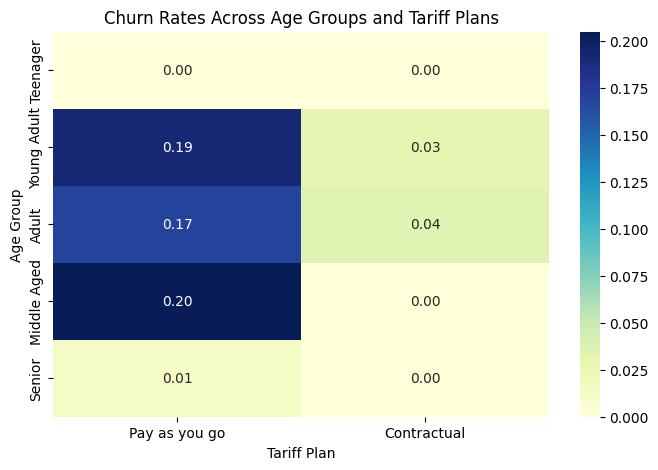

In [16]:
# Create a figure with specified size
plt.figure(figsize=(8, 5))

# Group the data by age group and tariff plan, and calculate the mean churn rate for each group
# We use the unstack func to pivot the table and make tariff plans as columns
churn_rates = clean_df.groupby(['age_group', 'tariff_plan']).churn.mean().unstack()

# Plot the heatmap with a different color palette
ax = sns.heatmap(churn_rates, annot=True, cmap='YlGnBu', fmt='.2f')

# Set the title of the heatmap
ax.set_title('Churn Rates Across Age Groups and Tariff Plans')

# Set the x-axis label
ax.set_xlabel('Tariff Plan')

# Set the y-axis label
ax.set_ylabel('Age Group')

# Set custom labels for the columns to reflect the tariff plan names
ax.set_xticklabels(['Pay as you go', 'Contractual'])

# Display the plot
plt.show()

**Observations and Answer**

The heatmap shows that the churn rates vary significantly across different combinations of age groups and tariff plans. Adults, Young Adults, and Middle Aged customers on the "Pay as you go" plan exhibit the highest churn rates, at 0.17, 0.19, and 0.20, respectively. In contrast, Teenagers and Seniors on the "Pay as you go" plan have almost no churn. For the "Contractual" plan, churn rates are generally lower across all age groups, with the highest being 0.04 for Adults.

**Implications**

The analysis indicates that Adults, Young Adults, and Middle Aged customers on the "Pay as you go" plan are at higher risk of churning. The visual suggests that the company should focus on keeping these segments by offering incentives to switch to the "Contractual" plan or by improving the "Pay as you go" plan to better meet their needs.

#### 3.1.3 What are the main factors contributing to high customer value, and how do they relate to churn?

**What we hope to understand**

By analyzing the correlation between customer value and other numerical attributes, we aim to identify key factors that contribute to high customer value. Additionally, understanding the relationship between these factors and customer churn can help in developing strategies to retain high-value customers.

In [17]:
# First we need to convert age_groups back into a numeric feature
clean_df['age_group'] = clean_df['age_group'].cat.codes


clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int8   
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  customer_value           2850 non-null   float64
 13  churn                    2850 non-null   int64  
dtypes: float64(1), int64(12), int

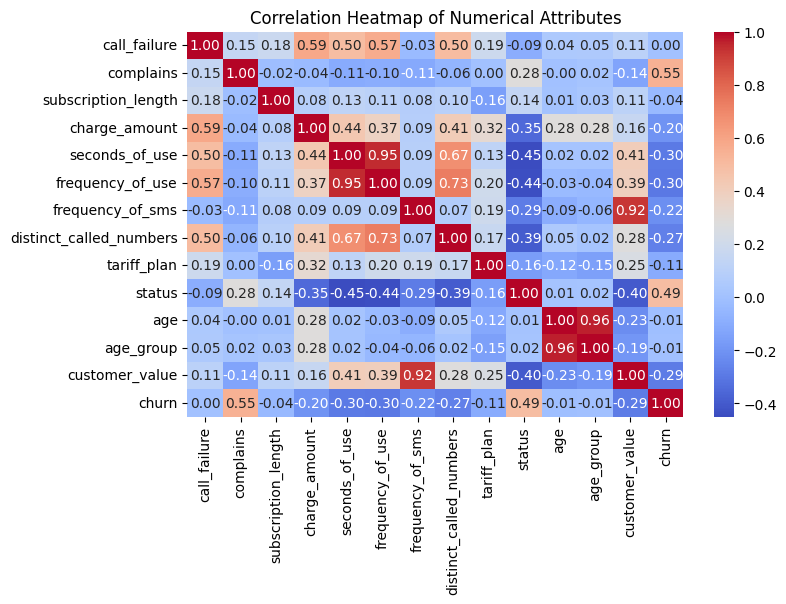

In [18]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Select features for correlation heatmap
correlation_matrix = clean_df[[
    'call_failure',
    'complains',
    'subscription_length',
    'charge_amount',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'tariff_plan',
    'status',
    'age',
    'age_group',
    'customer_value',
    'churn']].corr()

# Generate correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title of the plot
plt.title('Correlation Heatmap of Numerical Attributes')

# Display the plot
plt.show()

**Observations and Answer**

The correlation heatmap reveals several insights into the factors contributing to high customer value and their relation to churn. Customer_value shows a very strong positive correlation (0.92) with the frequency_of_sms, indicating that customers who send more SMS messages tend to have higher value. Additionally, a moderate positive correlation (0.41) between customer_value and seconds_of_use suggests that higher usage time contributes to higher customer value. The frequency of use also exhibits a moderate positive correlation (0.39) with customer_value. Regarding churn, there is a moderate positive correlation (0.55) between complains and churn, indicating that customers who complain more are more likely to churn. The status of the customer shows a moderate positive correlation (0.49) with churn. On the other hand, both the frequency_of_use and seconds_of_use have moderate negative correlations (-0.30) with churn, suggesting that more frequent and prolonged users are less likely to churn.

**Implications**

The analysis indicates that customers who send more SMS messages and use them more frequently are more valuable to the company and less likely to churn. Incentivizing higher SMS usage and ensuring customers remain engaged can increase customer_value. Reducing user complaints, possibly through network upgrades or better customer service, could help reduce churn.

## **4. Exceptional Work** (7000)

### **4.1 Dimensionality Reduction**

#### **What is Uniform Manifold Approximation and Projection (UMAP)?**
UMAP is a dimensionality reduction technique that creates lower-dimensional representations of higher-dimensional data. While other dimensionality reduction techniques struggle with larger datasets, UMAP is able to quickly and effectively reduce high-dimensional data by learning the structure of a dataset and then optimizing a reduced, low-dimensional representation that preserves the integrity and relationships within the original data.

#### **Give an Explaination of UMAP Dimensionality Reduction Methods**
Official UMAP documentation states that UMAP assumes higher-dimensional data lies on a lower-dimensional manifold within a given space. UMAP starts by creating a 'Fuzzy Simplicial Complex,' which, in simpler terms, is just a way to represent the relationship between data in a network of shapes, where the connections between points can sometimes be uncertain. In order to determine if data points are related, UMAP creates a radius from each data point based on "distance to each point nth nearest neighbor" (Pair-code, n.d.). The dataset's structure is thus preserved by assuming that each data point must at least be connected to its closest neighboring data point.

Let us write the code to use umap and then visualize our data

In [19]:
!pip install umap-learn # Install UMAP
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Get information on clean_df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int8   
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  customer_value           2850 non-null   float64
 13  churn                    2850 non-null   int64  
dtypes: float64(1), int64(12), int

In [20]:
# Normalize Dataframe to scale between 0 & 1. This helps with readability for binary features such as 'churn' or 'status'.
min = clean_df.min()
max = clean_df.max()

# Do z-score normalization
df_norm = (clean_df - min) / (max - min)

# Create UMAP Reducer Object with a fixed random seed and number of dimensions.
# The fixed random seed ensures that UMAP can reproduce results. Random seed chose from UMAP Documentation.
reducer = umap.UMAP(n_components=2, random_state=42)

# UMAP learns structure of df_norm, then transforms it to a lower-dimension (2D). This 'embeds' the data into 2 dimensional space.
embedding = reducer.fit_transform(df_norm)

# Displays the shape of the embedded dataframe after reduction. Should reduce to 2 dimensions as n_components=2.
embedding.shape

(2850, 2)

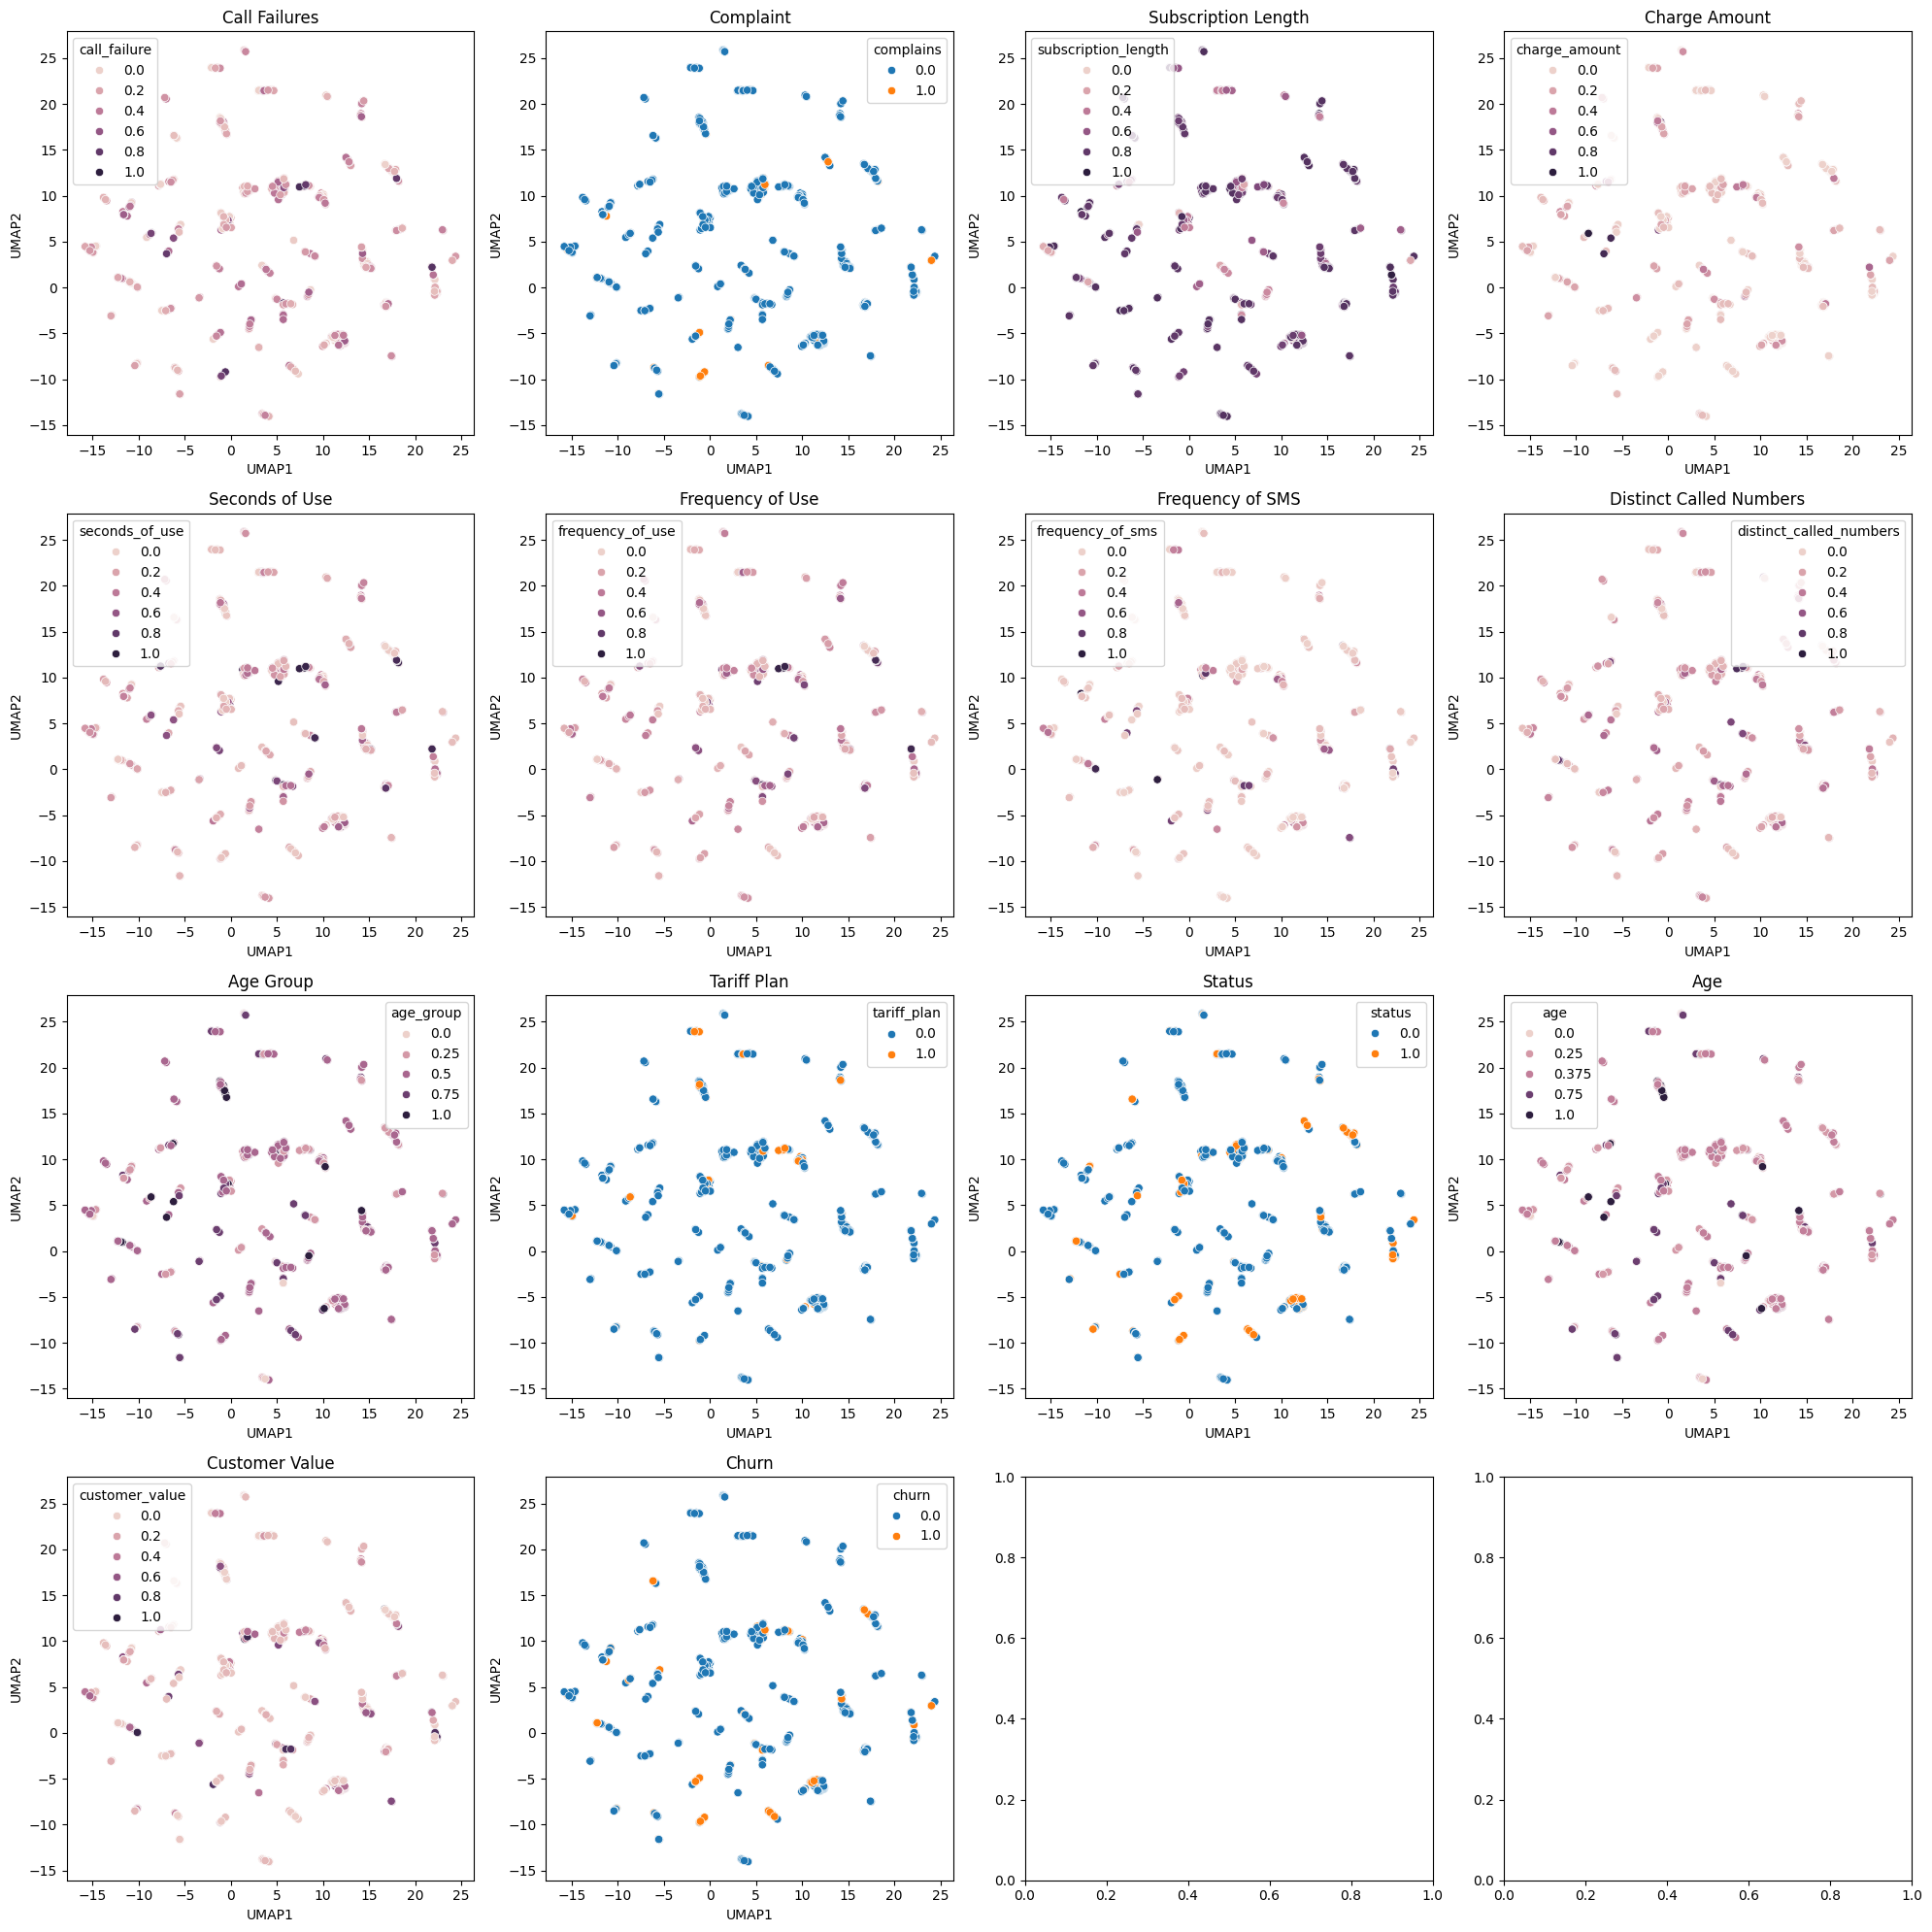

In [21]:
columns = ['call_failure', 'complains', 'subscription_length', 'charge_amount', 'seconds_of_use', 'frequency_of_use', 'frequency_of_sms', 'distinct_called_numbers', 'age_group','tariff_plan', 'status', 'age', 'customer_value', 'churn']
column_names = ['Call Failures', 'Complaint', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of Use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group','Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn']

# Determine the number of columns and rows for the subplot grid
import math as m

# Number of columns in the grid
n_cols = 4
# Calculate the number of rows needed by dividing the total number of columns by the number of columns in the grid and rounding up
n_rows = m.ceil(len(columns) / n_cols)

# Create a DataFrame from the embedding data
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Create a grid of subplots, ignore the returned figure
_, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the array from a 2D to 1D array so we can easily iterate through the array
axs = axs.flatten()

# Loop through each column to create scatter plots
for i in range(len(columns)):
    sns.scatterplot(ax=axs[i], x='UMAP1', y='UMAP2', hue=df_norm[columns[i]], data=embedding_df)
    axs[i].set_title(column_names[i])  # Set the title of the subplot
    axs[i].set_xlabel('UMAP1')  # Set the x-axis label
    axs[i].set_ylabel('UMAP2')  # Set the y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

#### **Analysis and Explaination**
**What Kind of Data is Visualized Above?**
We created a 2-dimensional scatterplot for each feature, where comparing the cluster density and the shading of each plot would give insight into possible patterns or relationships between the values of certain features. In order to do this, we first normalized the data from the previously cleaned dataframe using a z-score technique paired with min max to correctly represent the original values of binary features, such as 'churn' or 'status' while maintaining normalization. From here, we had UMAP learn the structure of the high-dimensional dataset and then transform and reduce it to be embedded in a lower dimensionality. Lastly, we implemented a scatterplot to visualize the results of the dimensionality reduction algorithm.

**What Patterns Are Seen In The Data?**
While the visualized data looks relatively sparse at a glance, a couple of larger clusters and many medium to smaller clusters are presented in the graph. Because binary representations of the data are initially difficult to see patterns in, we will leave out 'complains,' tariff_plan,' 'status,' and 'churn' for now. We will focus on the relationship between customer value and frequency of SMS, frequency of use, and seconds of use. The latter three features increase proportionally to customer use, with at least one, if not all, features increasing as a customer uses their device more. When looking at the clusters in the UMAP visualization, it is easy to see that the darker regions in the customer value visualization correspond to the darker regions of the four features mentioned above. For these four features, darker data points represent higher values. We can interpret from these visualizations that an increase in the frequency of SMS, frequency of use, and seconds of use positively correlates to customer value. In simpler terms, the more a customer uses their device, the more valuable the telecommunications company sees them.

One intriguing pattern in this dataset is the correlation between call failures and the frequency of use and seconds of use. It's a logical assumption that increased usage would lead to more recorded failures, as there are more opportunities for them to occur. This assumption is validated by the cluster shading, which mirrors the shading of clusters with higher frequency of use and higher seconds of use, indicating a direct relationship.

However, the inverse relationship between customer value and subscription length does not make much sense initially. On the surface level, it is logical to assume that longer subscriptions are more valuable to the telecommunications company; however, the data reflects the opposite. Why is that? Using ChatGPT, we asked what factors are typically associated with customer value calculations to a business, and one interesting thing was a factor called "purchase rate." ChatGPT, while the source of this data is unknown, proceeded to speak on how higher purchase rates make a customer more valuable to a company. Things begin to make sense when comparing this new information to the data seen in the visualizations. Customers with a lengthier subscription plan show a lower value in the data. Then, when comparing this to the tariff plan feature, a binary feature where 1 represents "pay-as-you-go" and 2 represents "contractual," you see a similar pattern. While the data is not entirely definitive, there is a visible pattern among some clusters. Customers who paid as they went, which made more purchases, were valued higher by the company than those with contractual payments.


#### **Resources**

Links 1-5 represent knowledge seeking links, but no direct quotes or code fragments.

UMAP: User Guide / Tutorial |
Link 1: https://umap-learn.readthedocs.io/en/latest/

RS Blog: Machine Learning & Statistics |
Link 2: https://www.reneshbedre.com/blog/umap-in-python.html

Python Package Index: UMAP Learn |
Link 3: https://pypi.org/project/umap-learn/

UMAP: How To Use UMAP |
Link 4: https://umap-learn.readthedocs.io/en/latest/basic_usage.html

Seaborn: Pairplot & Scatterplot |
Link 5: https://seaborn.pydata.org/generated/seaborn.pairplot.html


## **Reference**

* Iranian Churn. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5JW3Z.

* The World Bank. (n.d.). Telecom data. Retrieved June 8, 2024, from https://dimewiki.worldbank.org/Telecom_Data#:~:text=Every%20time%20you%20use%20your,telecom%20operator%20on%20that%20transaction.

* Fiddler AI. (n.d.). Which is more important: Model performance or model accuracy? Fiddler AI. Retrieved June 8, 2024, from https://www.fiddler.ai/model-accuracy-vs-model-performance/which-is-more-important-model-performance-or-model-accuracy

* Raschka, S. (2019). Python machine learning (3rd ed.). Packt Publishing. Retrieved from https://www.packtpub.com/product/python-machine-learning-third-edition/9781789955750



*   Pair-code. (n.d.). Understanding UMAP. Pair-code. Retrieved June 8, 2024, from https://pair-code.github.io/understanding-umap/

